# 4.1. Phân tích thống kê và xu hướng dịch COVID-19 (Global)

### Import các thư viện cần thiết

Cell này dùng để import các thư viện Python phục vụ cho:
- Xử lý và phân tích dữ liệu dạng bảng
- Trực quan hóa dữ liệu
- Phân tích thống kê

Các thư viện được sử dụng gồm:
- `pandas`: xử lý dữ liệu
- `matplotlib`: vẽ biểu đồ cơ bản
- `seaborn`: trực quan hóa nâng cao


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu COVID-19 từ file CSV

Cell này đọc dữ liệu chuỗi thời gian COVID-19 đã được làm sạch từ nguồn WHO.
Sau khi đọc dữ liệu, hiển thị một số dòng đầu để:
- Kiểm tra cấu trúc dữ liệu
- Xác nhận tên các cột
- Đảm bảo dữ liệu được load thành công


In [26]:
df = pd.read_csv("../data/processed/01_clean_daily_timeseries.csv.gz")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,New_deaths,Cumulative_cases,Cumulative_deaths,New_cases_MA7,New_deaths_MA7,Growth_Rate
0,2020-01-04,AF,Afghanistan,EMR,0.0,0.0,0,0,0.0,0.0,0.0
1,2020-01-05,AF,Afghanistan,EMR,0.0,0.0,0,0,0.0,0.0,0.0
2,2020-01-06,AF,Afghanistan,EMR,0.0,0.0,0,0,0.0,0.0,0.0
3,2020-01-07,AF,Afghanistan,EMR,0.0,0.0,0,0,0.0,0.0,0.0
4,2020-01-08,AF,Afghanistan,EMR,0.0,0.0,0,0,0.0,0.0,0.0


## 4.1.1. Thống kê mô tả theo quốc gia

### Mục tiêu
Tính các thống kê cơ bản cho **toàn bộ quốc gia**, bao gồm:

- Mean (trung bình)
- Median (trung vị)
- Min – Max
- Standard Deviation (độ lệch chuẩn)

Áp dụng cho các biến:
- Ca nhiễm / 1.000.000 dân
- Ca tử vong / 1.000.000 dân
- Tỷ lệ tử vong (CFR)

### Tổng hợp dữ liệu theo quốc gia

Cell này thực hiện:
- Gom nhóm dữ liệu theo từng quốc gia (`Country`)
- Lấy giá trị lớn nhất của:
  - Tổng số ca nhiễm
  - Tổng số ca tử vong

Mục đích:
- Mỗi quốc gia chỉ còn một bản ghi đại diện
- Phản ánh mức độ ảnh hưởng tổng thể của dịch tại từng quốc gia


In [27]:
country_df = df.groupby("Country")[[
    "Cumulative_cases",
    "Cumulative_deaths"
]].max().reset_index()

### Tính tỷ lệ tử vong (CFR)

Cell này tính **Case Fatality Rate (CFR)** cho từng quốc gia bằng công thức:

CFR = Tổng ca tử vong / Tổng ca nhiễm

Chỉ số CFR phản ánh:
- Mức độ nghiêm trọng của dịch
- Khả năng điều trị và năng lực hệ thống y tế


In [28]:
country_df["CFR"] = country_df["Cumulative_deaths"] / country_df["Cumulative_cases"]
country_df.describe()

,Cumulative_cases,Cumulative_deaths,CFR
count,2.400000e+02,2.400000e+02,238.000000
mean,3.244897e+06,2.960110e+04,0.012081
std,1.130344e+07,1.076569e+05,0.015519
min,0.000000e+00,0.000000e+00,0.000000
25%,2.135850e+04,1.605000e+02,0.003714
50%,1.726535e+05,1.465500e+03,0.008253
75%,1.253152e+06,1.239350e+04,0.016203
max,1.034368e+08,1.228289e+06,0.180745


### Nhận xét thống kê mô tả

- **Mean lớn hơn median** ở cả ca nhiễm và ca tử vong → phân phối **lệch phải mạnh**
- Phần lớn quốc gia có số ca tương đối thấp, trong khi **một số ít quốc gia có giá trị cực lớn**
- Độ lệch chuẩn rất cao cho thấy:
  - Mức độ dịch **không đồng đều**
  - Sự khác biệt rõ rệt về năng lực y tế, dân số và chính sách kiểm soát dịch
- CFR trung bình thấp, nhưng có quốc gia CFR cao → dấu hiệu hệ thống y tế chịu áp lực lớn


### Vẽ Histogram phân bố tổng số ca nhiễm theo quốc gia

Cell này vẽ biểu đồ Histogram để:
- Quan sát phân bố tổng số ca nhiễm giữa các quốc gia
- Xác định dạng phân phối dữ liệu
- Phát hiện sự lệch và các giá trị cực đoan


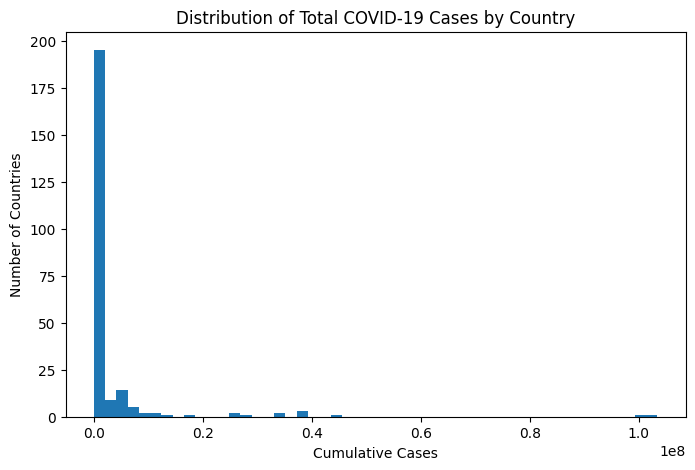

In [29]:
plt.figure(figsize=(8,5))
plt.hist(country_df["Cumulative_cases"], bins=50)
plt.xlabel("Cumulative Cases")
plt.ylabel("Number of Countries")
plt.title("Distribution of Total COVID-19 Cases by Country")
plt.show()

- Phân bố lệch phải rõ rệt
- Một số quốc gia nằm ở đuôi phải với tổng ca nhiễm rất cao
- Dữ liệu không tuân theo phân phối chuẩn

### Vẽ Histogram phân bố tổng số ca tử vong theo quốc gia

Cell này dùng để trực quan hóa:
- Phân bố tổng số ca tử vong giữa các quốc gia
- Mức độ chênh lệch về tác động của dịch

Histogram hỗ trợ đánh giá:
- Độ phân tán
- Sự tồn tại của các quốc gia có số tử vong rất cao


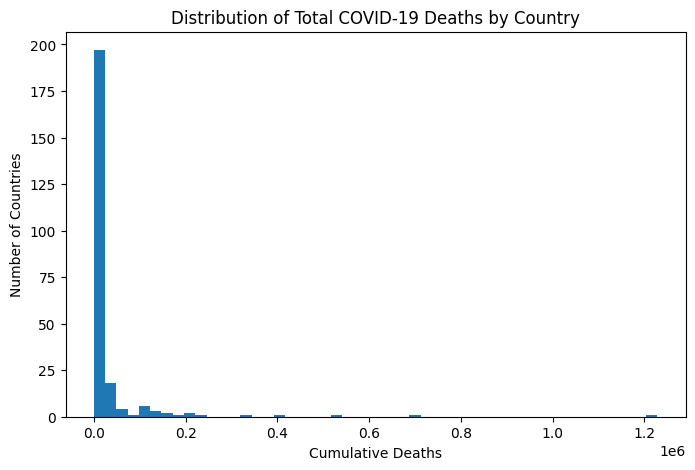

In [30]:
plt.figure(figsize=(8,5))
plt.hist(country_df["Cumulative_deaths"], bins=50)
plt.xlabel("Cumulative Deaths")
plt.ylabel("Number of Countries")
plt.title("Distribution of Total COVID-19 Deaths by Country")
plt.show()

- Sự phân tán lớn giữa các quốc gia
- Chỉ một nhóm nhỏ quốc gia ghi nhận số tử vong rất cao
- Phản ánh sự khác biệt trong năng lực điều trị và kiểm soát dịch

### Boxplot so sánh các chỉ số dịch tễ giữa các quốc gia

Cell này vẽ Boxplot cho các chỉ số:
- Tổng ca nhiễm
- Tổng ca tử vong
- CFR

Mục đích:
- So sánh phân bố dữ liệu giữa các chỉ số
- Phát hiện các quốc gia ngoại lệ (outliers)
- Đánh giá mức độ chênh lệch tổng thể


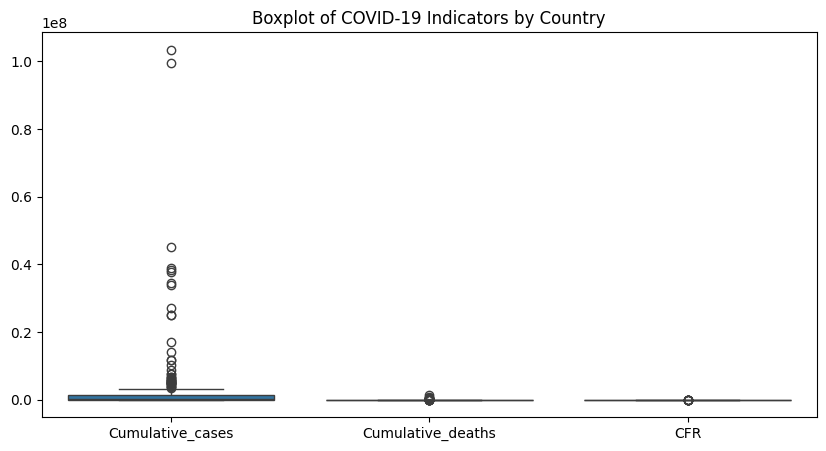

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=country_df[["Cumulative_cases", "Cumulative_deaths", "CFR"]])
plt.title("Boxplot of COVID-19 Indicators by Country")
plt.show()

### Phân tích Boxplot

- Xuất hiện rất nhiều **outliers**
- Cho thấy mức độ dịch giữa các quốc gia chênh lệch lớn
- Đây là cơ sở quan trọng cho:
  - Phân cụm quốc gia
  - Phân loại mức độ ảnh hưởng của dịch

## 4.1.2. Phân tích xu hướng dịch theo thời gian (Global)


### Tổng hợp dữ liệu toàn cầu theo thời gian

Cell này thực hiện:
- Gom nhóm dữ liệu theo ngày báo cáo (`Date_reported`)
- Tính tổng số ca nhiễm và tử vong toàn cầu mỗi ngày

Mục đích:
- Phân tích xu hướng dịch ở quy mô toàn cầu
- Loại bỏ yếu tố khác biệt giữa các quốc gia


In [33]:

global_df = df.groupby("Date_reported")[[
    "New_cases",
    "New_deaths",
    "New_cases_MA7",
    "New_deaths_MA7"
]].sum().reset_index()
global_df["CFR"] = (global_df["New_deaths"] / global_df["New_cases"])*100
global_df["Date_reported"] = pd.to_datetime(global_df["Date_reported"])

### Biểu đồ xu hướng ca nhiễm toàn cầu theo thời gian

Cell này vẽ biểu đồ đường thể hiện:
- Sự thay đổi số ca nhiễm toàn cầu theo thời gian
- Các đợt bùng phát lớn của đại dịch

Biểu đồ giúp nhận diện:
- Đỉnh dịch
- Giai đoạn suy giảm


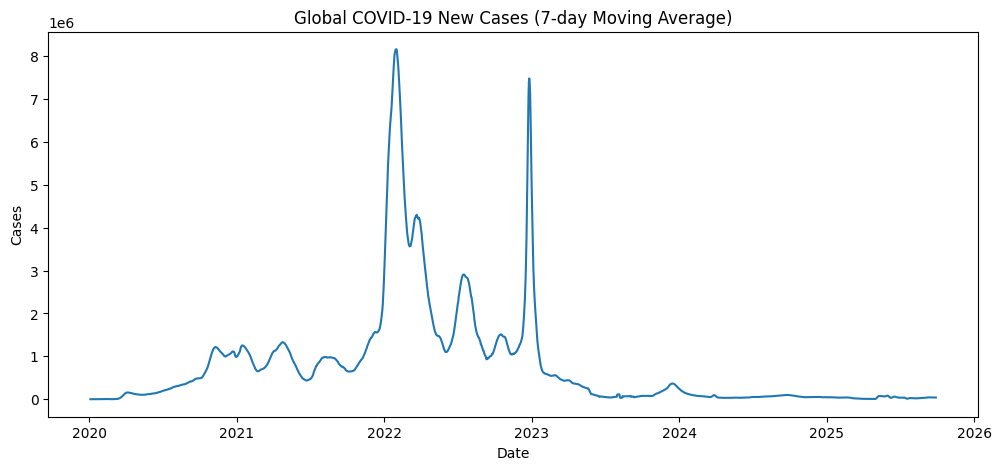

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(global_df["Date_reported"], global_df["New_cases_MA7"])
plt.title("Global COVID-19 New Cases (7-day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

### Biểu đồ xu hướng ca tử vong toàn cầu theo thời gian

Cell này vẽ biểu đồ đường cho:
- Số ca tử vong toàn cầu theo thời gian
- So sánh xu hướng với ca nhiễm

Qua đó phân tích:
- Độ trễ giữa ca nhiễm và ca tử vong
- Áp lực lên hệ thống y tế


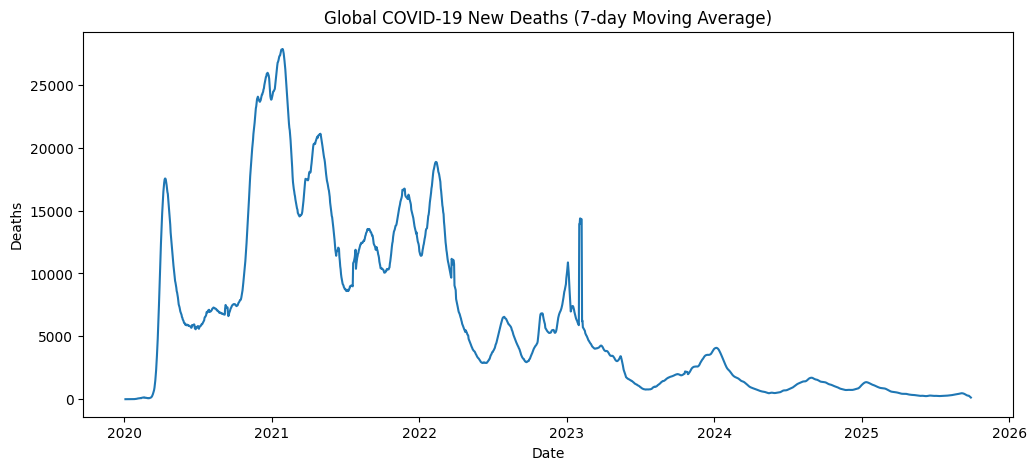

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(global_df["Date_reported"], global_df["New_deaths_MA7"])
plt.title("Global COVID-19 New Deaths (7-day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.show()

### Phân tích xu hướng

- Có thể nhận diện rõ nhiều **đợt bùng phát lớn trên toàn cầu**
- Số ca tử vong thường tăng **sau số ca nhiễm một khoảng thời gian**
- Thể hiện mối quan hệ nhân quả giữa:
  - Lây nhiễm diện rộng
  - Áp lực lên hệ thống y tế

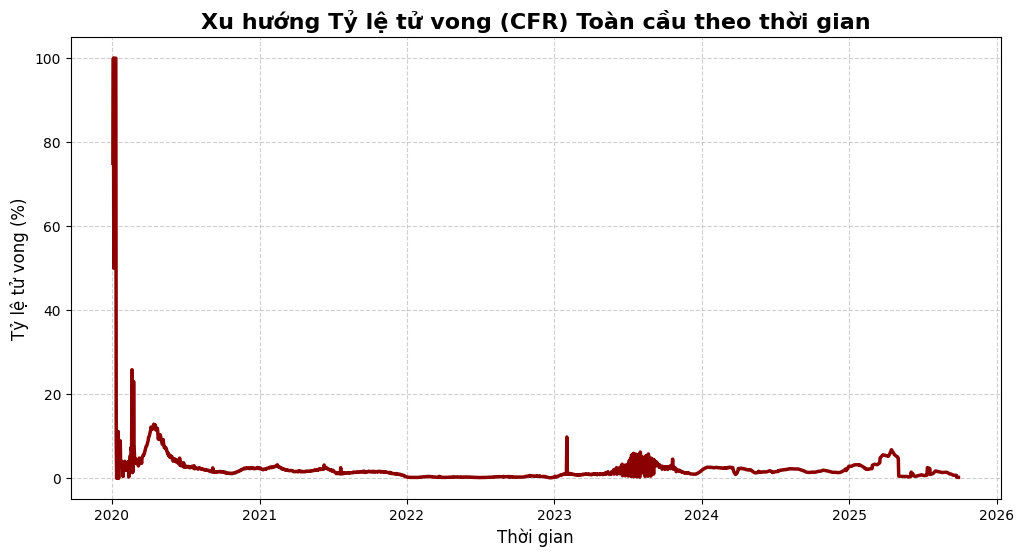

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_df, x='Date_reported', y='CFR', color='darkred', linewidth=2.5)

plt.title('Xu hướng Tỷ lệ tử vong (CFR) Toàn cầu theo thời gian', fontsize=16, fontweight='bold')
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Tỷ lệ tử vong (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Lưu biểu đồ (tùy chọn)
plt.savefig('Global_CFR_Trend.png', dpi=300)
plt.show()

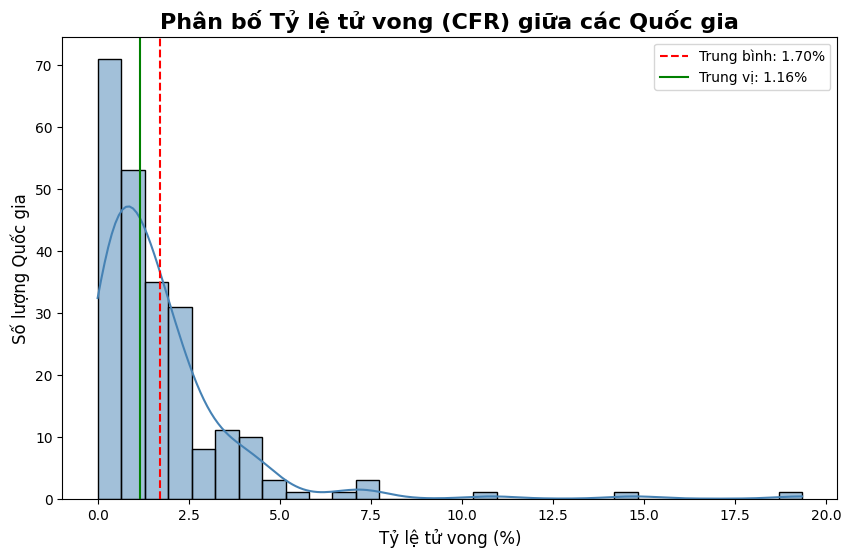

In [35]:
#PHÂN BỐ CFR GIỮA CÁC QUỐC GIA (HISTOGRAM)
country_stats = df.groupby('Country')[['New_cases', 'New_deaths']].sum().reset_index()

# Bước 2: Lọc bỏ các quốc gia quá nhỏ (nhiễu)
# Ví dụ: Chỉ lấy các nước có trên 1000 ca nhiễm
country_stats = country_stats[country_stats['New_cases'] > 1000].copy()

# Bước 3: Tính CFR cho từng quốc gia
country_stats['CFR'] = (country_stats['New_deaths'] / country_stats['New_cases']) * 100

# Bước 4: Vẽ biểu đồ Histogram kết hợp đường mật độ (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data=country_stats, x='CFR', kde=True, bins=30, color='steelblue', edgecolor='black')

plt.title('Phân bố Tỷ lệ tử vong (CFR) giữa các Quốc gia', fontsize=16, fontweight='bold')
plt.xlabel('Tỷ lệ tử vong (%)', fontsize=12)
plt.ylabel('Số lượng Quốc gia', fontsize=12)

# Thêm đường trung bình (Mean) và trung vị (Median) để nhận xét
plt.axvline(country_stats['CFR'].mean(), color='red', linestyle='--', label=f'Trung bình: {country_stats["CFR"].mean():.2f}%')
plt.axvline(country_stats['CFR'].median(), color='green', linestyle='-', label=f'Trung vị: {country_stats["CFR"].median():.2f}%')
plt.legend()

# Lưu biểu đồ
plt.savefig('Country_CFR_Distribution.png', dpi=300)
plt.show()

## 4.1.3. Phân tích tương quan các chỉ số dịch tễ

### Mục tiêu
Phân tích mối quan hệ giữa các chỉ số dịch tễ quan trọng nhằm:

- Hiểu mức độ liên hệ giữa ca nhiễm và ca tử vong
- Đánh giá vai trò của tỷ lệ tử vong (CFR)
- Xác định các biến có tương quan mạnh để:
  - Trích xuất đặc trưng
  - Xây dựng mô hình phân cụm hoặc dự báo


### Các chỉ số sử dụng trong phân tích

- **Cumulative_cases**: Tổng số ca nhiễm theo quốc gia
- **Cumulative_deaths**: Tổng số ca tử vong theo quốc gia
- **CFR (Case Fatality Rate)**: Tỷ lệ tử vong trên tổng số ca nhiễm
- **Growth_Rate**: Tốc độ tăng trưởng số ca nhiễm

Tất cả các chỉ số được tổng hợp ở mức **quốc gia**, đại diện cho mức độ ảnh hưởng chung của dịch.


### Chuẩn bị dữ liệu cho phân tích tương quan

Cell này tạo tập dữ liệu tổng hợp theo quốc gia bao gồm:
- Tổng ca nhiễm
- Tổng ca tử vong
- Tốc độ tăng trưởng trung bình
- Tỷ lệ tử vong (CFR)

Dữ liệu này được sử dụng để:
- Phân tích mối quan hệ giữa các chỉ số dịch tễ


In [ ]:
corr_df = df.groupby("Country").agg({
    "Cumulative_cases": "max",
    "Cumulative_deaths": "max",
    "Growth_Rate": "mean"
}).reset_index()

corr_df["CFR"] = corr_df["Cumulative_deaths"] / corr_df["Cumulative_cases"]

corr_df = corr_df[[
    "Cumulative_cases",
    "Cumulative_deaths",
    "CFR",
    "Growth_Rate"
]]

### Giải thích xử lý dữ liệu

- Lấy **giá trị lớn nhất** của ca nhiễm và ca tử vong để phản ánh tổng mức ảnh hưởng của dịch tại mỗi quốc gia
- Tốc độ tăng trưởng (`Growth_Rate`) được lấy **trung bình**, phản ánh xu hướng tăng chung
- CFR được tính toán từ dữ liệu tổng hợp, đảm bảo tính nhất quán


### Tính ma trận tương quan

Cell này tính **ma trận tương quan Pearson** giữa các biến dịch tễ.

Mục đích:
- Định lượng mức độ liên hệ giữa các chỉ số
- Xác định các biến có tương quan mạnh hoặc yếu


In [ ]:
correlation_matrix = corr_df.corr()
correlation_matrix

,Cumulative_cases,Cumulative_deaths,CFR,Growth_Rate
Cumulative_cases,1.000000,0.767174,-0.055208,-0.000316
Cumulative_deaths,0.767174,1.000000,0.071831,-0.015674
CFR,-0.055208,0.071831,1.000000,0.102515
Growth_Rate,-0.000316,-0.015674,0.102515,1.000000


### Giải thích hệ số tương quan

- Giá trị gần **1**: tương quan dương mạnh
- Giá trị gần **0**: tương quan yếu hoặc không có
- Giá trị gần **-1**: tương quan âm mạnh

Phân tích tương quan giúp xác định các biến **cung cấp thông tin trùng lặp** hoặc **bổ trợ lẫn nhau**.


### Heatmap – Ma trận tương quan các chỉ số dịch tễ


### Trực quan hóa ma trận tương quan bằng Heatmap

Cell này dùng heatmap để:
- Trực quan hóa mối quan hệ giữa các biến dịch tễ
- Giúp so sánh nhanh mức độ tương quan
- Hỗ trợ quyết định lựa chọn đặc trưng cho mô hình


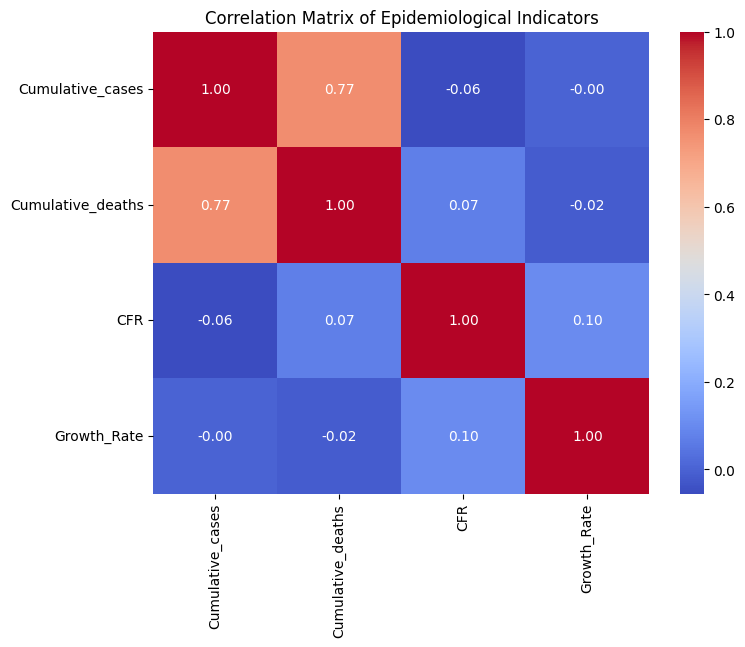

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix of Epidemiological Indicators")
plt.show()

### Phân tích kết quả tương quan

- **Cumulative_cases và Cumulative_deaths** có tương quan dương rất mạnh:
  - Cho thấy số ca tử vong tăng theo quy mô lây nhiễm
  - Phản ánh quy luật dịch tễ cơ bản

- **CFR có tương quan yếu với tổng số ca nhiễm**:
  - CFR phản ánh chất lượng hệ thống y tế và khả năng điều trị
  - Không phụ thuộc trực tiếp vào số lượng ca nhiễm

- **Growth_Rate có tương quan thấp với tổng ca tích lũy**:
  - Quốc gia đã trải qua đỉnh dịch thường có tốc độ tăng thấp
  - Trong khi các quốc gia đang bùng phát có Growth Rate cao nhưng tổng ca chưa lớn

- Không tồn tại tương quan âm mạnh → các biến không mâu thuẫn nhau


### Hàm ý cho bước trích xuất đặc trưng và mô hình

- Các biến **Cumulative_cases** và **Cumulative_deaths** có thông tin trùng lặp → có thể:
  - Giữ 1 biến
  - Hoặc kết hợp bằng PCA

- **CFR** là biến độc lập quan trọng:
  - Phân biệt mức độ nghiêm trọng giữa các quốc gia
  - Hữu ích trong phân cụm và phân loại rủi ro

- **Growth_Rate** phản ánh động lực dịch:
  - Phù hợp cho mô hình dự báo
  - Giúp phát hiện quốc gia đang trong giai đoạn bùng phát
